# Regression 

Import libraries 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

### Simple regression

Load and preprocess dataset

In [5]:
df = pd.read_csv("./data/salary_data.csv")

In [6]:
x = df['YearsExperience'].to_numpy()
y = df['Salary'].to_numpy()

<AxesSubplot:>

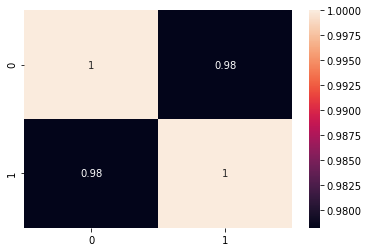

In [10]:
sns.heatmap(np.corrcoef(x,y), annot = True)

In [8]:
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size =0.2, random_state=0)

In [9]:
X_train=X_train.reshape(X_train.shape[0],1)
y_train=y_train.reshape(y_train.shape[0],1)
y_test=y_test.reshape(y_test.shape[0],1)
X_test=X_test.reshape(X_test.shape[0],1)

Fit simpe regression model 

In [12]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Visualizing best fit line with train and test sets separated

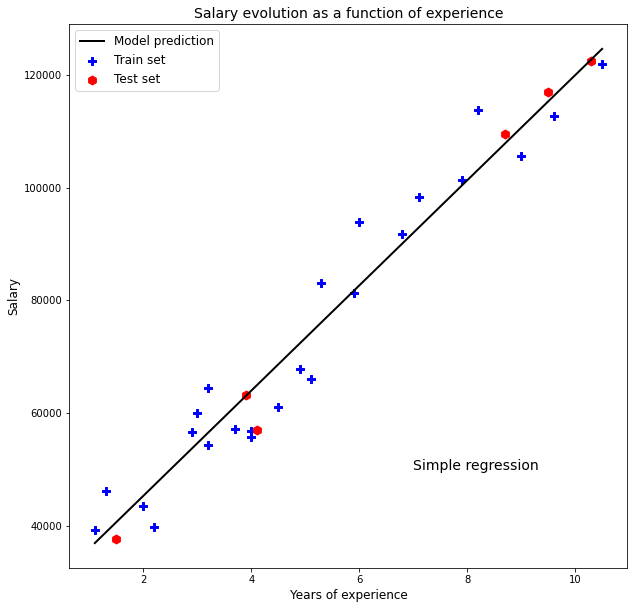

In [15]:
ax, fig =plt.subplots(figsize=(10,10))
plt.scatter(X_train,y_train, s=80, c='b', marker='P', label="Train set")
plt.scatter(X_test,y_test, s=80, c='r', marker='h', label= 'Test set')
plt.plot(x,regressor.predict(x.reshape(x.shape[0],1)), c='black', lw=2, label= 'Model prediction')

# plt.xlim(0,10)
plt.xlabel('Years of experience', fontsize=12)
plt.ylabel('Salary', fontsize=12)
plt.title('Salary evolution as a function of experience',fontsize=14)
plt.text(7, 50000, "Simple regression", fontsize=14)

plt.legend(fontsize=12, loc=0)

### Simple regression (from scratch)

Reloading data set and adding a constant to x (for dealing with intercept)

In [16]:
x = df.iloc[:,:1]
x['constant'] = 1
X=x.to_numpy()

y = df.iloc[:,1:]
y=y.to_numpy()
y = y.reshape(y.shape[0],1)

Defining variables

In [23]:
# Initializing theta with two random figures 
theta = np.random.rand(2,1)
print(theta)

# setting n iter and learning rate
n_iterations=10
learning_rate=0.01

[[0.60326874]
 [0.71914406]]


Regression model function

In [24]:
def model (X, theta):
    F = X @ theta
#    F = np.dot(X, theta) # alternatively 
    return F

Mean square error, gradient and gradient descent function 

In [25]:
def MSE(X,y,theta):
    result = 1/(2*X.shape[0]) * np.sum((X @ theta - y )**2)
    return result

In [26]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [27]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history =np.zeros(n_iterations)
    thetaiter = np.random.rand(2,1,n_iterations)
    for i in range(0,n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        thetaiter[:,:,i]=theta
        cost_history[i] = MSE(X,y,theta)
    return theta, thetaiter, cost_history

In [28]:
theta_final, thetaiter, cost_history= gradient_descent(X, y, theta, learning_rate, n_iterations)

Function that saves predictions for the ten first iterations

In [29]:
def predict_it10 (X, thetaiter): 
    predict = np.random.rand(len(X),1,10)
    for i in range (10): 
        predict[:,:,i]=model(X, thetaiter[:,:,i])
    return predict 

Saving intial, intermediary and final predictions 

In [ ]:
predictinit = model(X, theta)

In [30]:
predict_all_iter = predict_it10 (X, thetaiter)

In [32]:
predictions = model(X, theta_final)

Model performance function (r_square)

In [36]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [37]:
coef_determination(y, predictions)

Salary    0.793624
dtype: float64

Visualizing regression line evolution during gradient descent

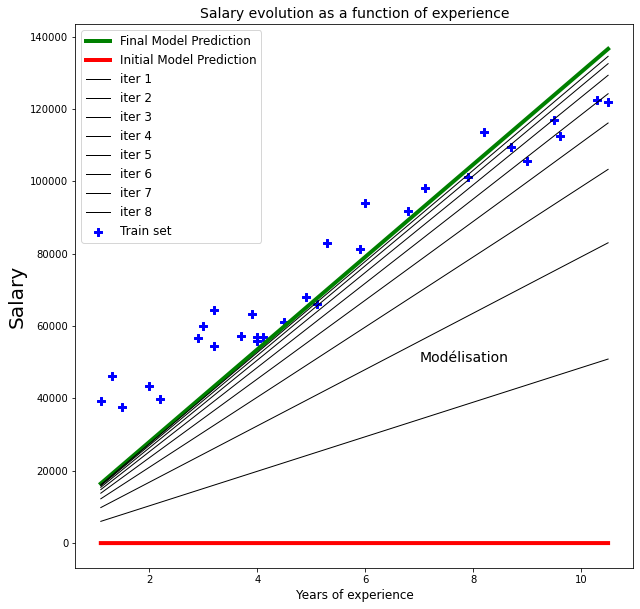

In [34]:
ax, fig =plt.subplots(figsize=(10,10))
plt.scatter(X[:,0],y, s=80, c='b', marker='P', label="Train set")
plt.plot(X[:,0],predictions, c='green', lw=4, label= 'Final Model Prediction')
plt.plot(X[:,0],predictinit, c='red', lw=4, label= 'Initial Model Prediction')

# plot intermediate prediction iter 0 to 10
plt.plot(X[:,0],predict_all_iter[:,:,0], c='black', lw=1, label= 'iter 1')
plt.plot(X[:,0],predict_all_iter[:,:,1], c='black', lw=1, label= 'iter 2')
plt.plot(X[:,0],predict_all_iter[:,:,2], c='black', lw=1, label= 'iter 3')
plt.plot(X[:,0],predict_all_iter[:,:,3], c='black', lw=1, label= 'iter 4')
plt.plot(X[:,0],predict_all_iter[:,:,4], c='black', lw=1, label= 'iter 5')
plt.plot(X[:,0],predict_all_iter[:,:,5], c='black', lw=1, label= 'iter 6')
plt.plot(X[:,0],predict_all_iter[:,:,6], c='black', lw=1, label= 'iter 7')
plt.plot(X[:,0],predict_all_iter[:,:,7], c='black', lw=1, label= 'iter 8')
# plt.plot(X[:,0],predict_all_iter[:,:,8], c='black', lw=1, label= 'iter 9')
# plt.plot(X[:,0],predict_all_iter[:,:,9], c='black', lw=1, label= 'iter 10')

# plt.xlim(0,10)
plt.xlabel('Years of experience', fontsize=12)
plt.ylabel('Salary', fontsize=20)
plt.title('Salary evolution as a function of experience',fontsize=14)
plt.text(7, 50000, "Modélisation", fontsize=14)

plt.legend(fontsize=12, loc=0)

Visualizing learning curve 

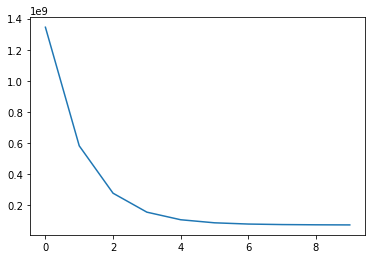

In [35]:
plt.plot(range(n_iterations), cost_history)

### Multiple linear regression 

In [106]:
df = pd.read_csv('./data/data_multi.csv')
df.head(3)

,x_1,x_2,y
0,1.054452,-1.070753,-81.464433
1,-0.362741,-0.634322,-78.752795
2,-0.854096,0.313068,2.218414


Load and preprocess dataset

In [107]:
X = df.iloc[:,:2] # X for visualizing relations between variables 
X=X.to_numpy()
Xcst = df.iloc[:,:2] # X with added constant for modelization
Xcst['constant'] = 1
Xcst=Xcst.to_numpy()
y = df.iloc[:,2:]
y=y.to_numpy()

Exploring/visualizing relations between variables 

In [108]:
df.corr()

,x_1,x_2,y
x_1,1.000000,-0.024005,0.235650
x_2,-0.024005,1.000000,0.930299
y,0.235650,0.930299,1.000000


In [109]:
sns.heatmap(df.corr(), annot = True)

<AxesSubplot:>

<IPython.core.display.Javascript object>


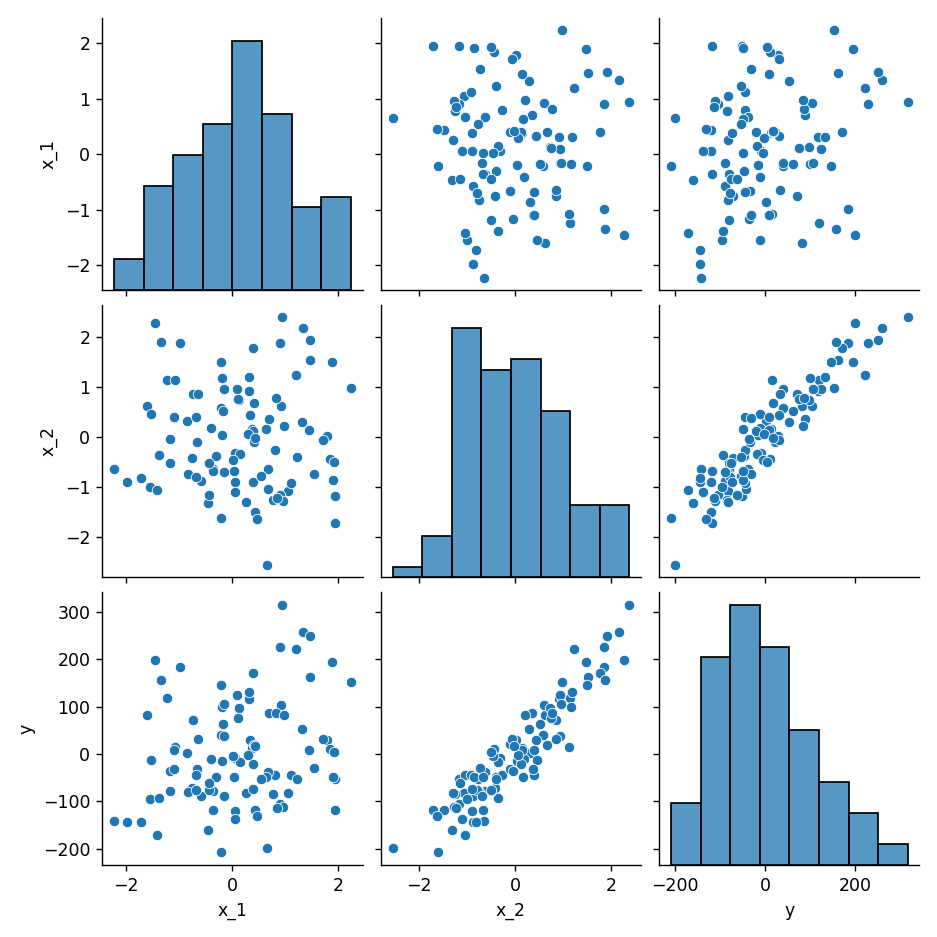

In [110]:
sns.pairplot(df)

<IPython.core.display.Javascript object>


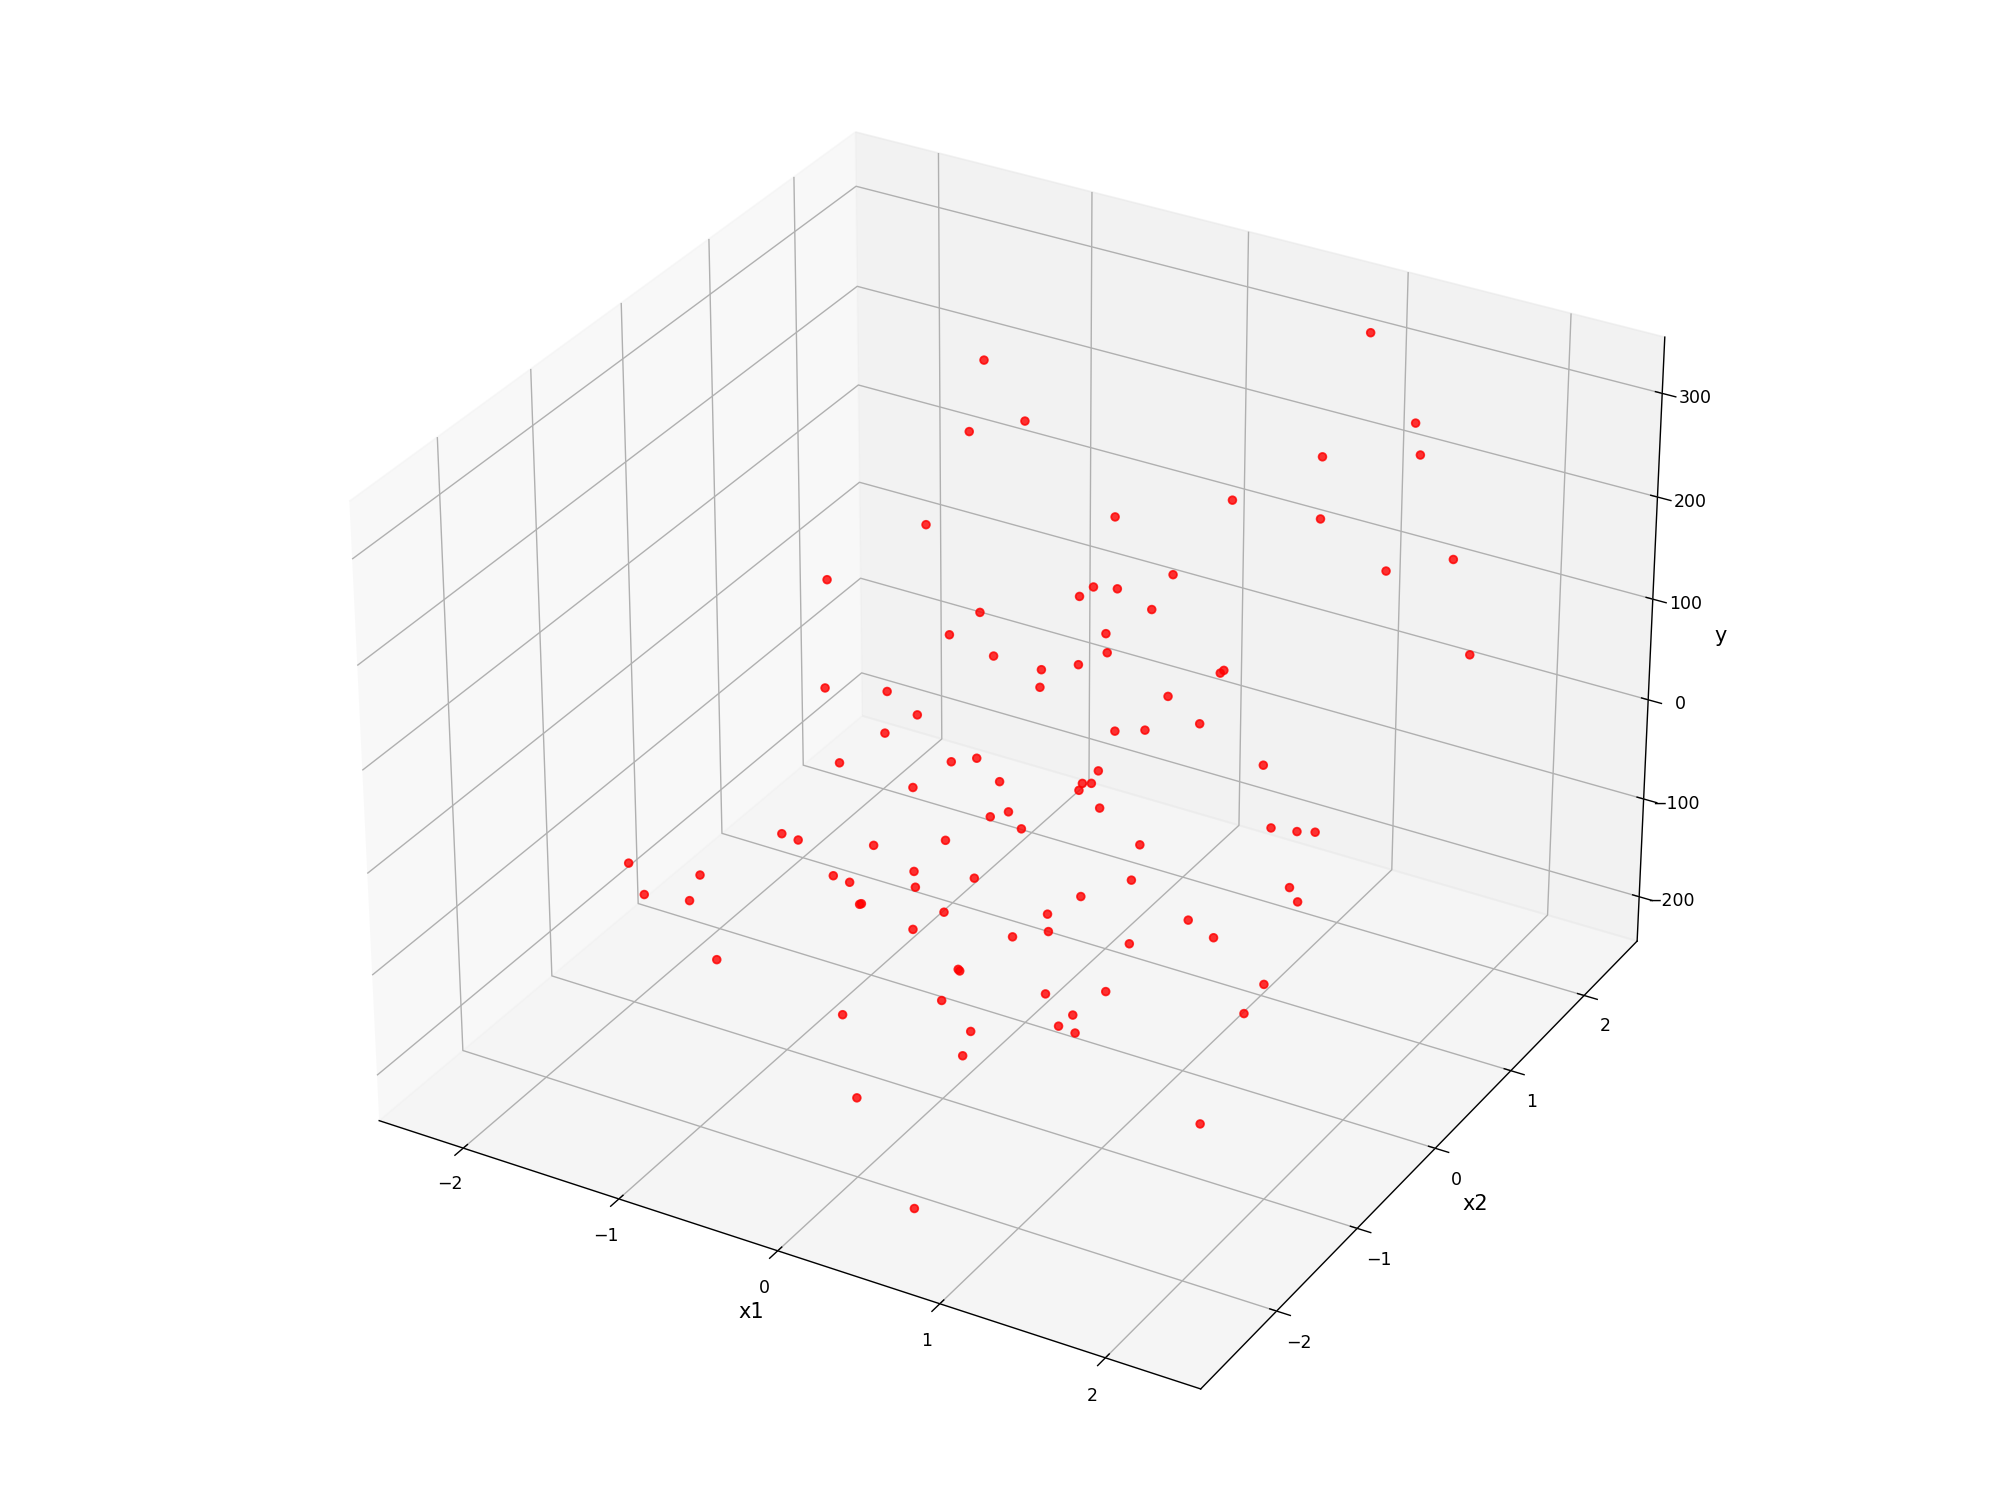

In [111]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(projection='3d')

ax.scatter(X[:,0] ,X[:,1], y, c = 'r', s= 20, depthshade=True,alpha=0.8)

ax.set_xlabel('x1', fontsize=12)
ax.set_ylabel('x2', fontsize=12)
ax.set_zlabel('y', fontsize=12)
plt.tight_layout(pad=1.08,h_pad=X[:,0], w_pad=X[:,1])
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>


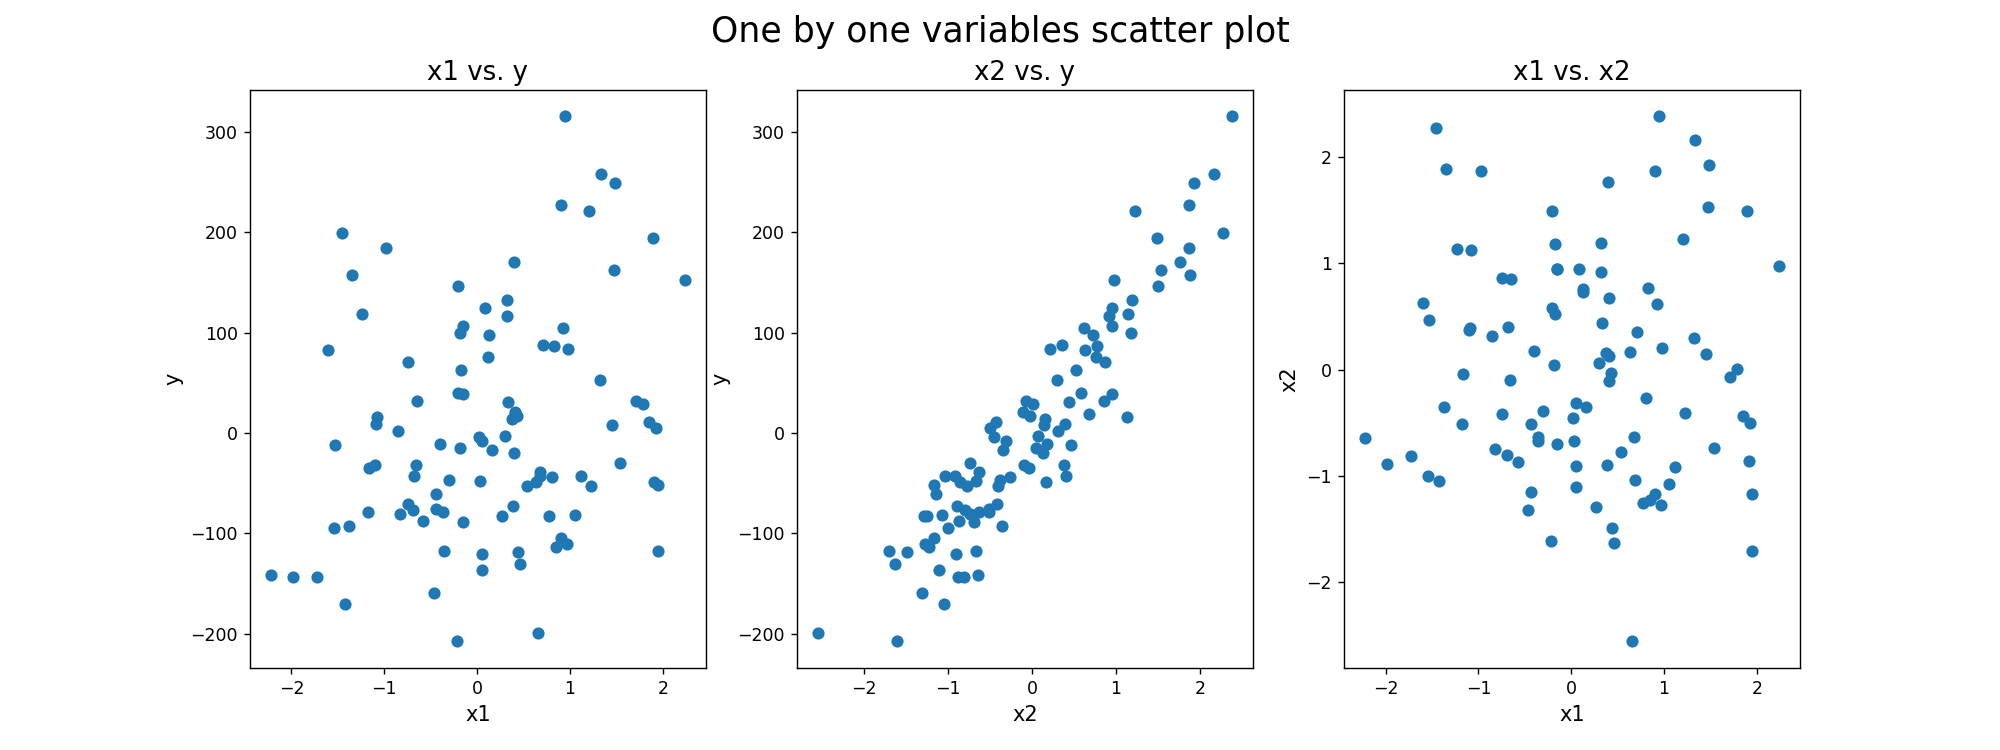

Text(0, 0.5, 'x2')

In [116]:
import matplotlib.pyplot as plt
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=False, figsize=(16,6))
fig.suptitle('One by one variables scatter plot', fontsize=20)

ax1.set_title('x1 vs. y',fontsize=15)
ax1.scatter(X[:,0], y)
ax1.set_xlabel('x1', fontsize=12)
ax1.set_ylabel('y', fontsize=12)

ax2.set_title('x2 vs. y',fontsize=15)
ax2.scatter(X[:,1], y)
ax2.set_xlabel('x2', fontsize=12)
ax2.set_ylabel('y', fontsize=12)

ax3.set_title('x1 vs. x2',fontsize=15)
ax3.scatter(X[:,0] ,X[:,1])
ax3.set_xlabel('x1', fontsize=12)
ax3.set_ylabel('x2', fontsize=12)

Defining variables

In [47]:
# Initializing theta with two random figures 
theta = np.random.rand(3,1)
print(theta)

# setting n iter and learning rate
n_iterations=300
learning_rate=0.01

[[0.6603059 ]
 [0.28547562]
 [0.70943708]]


Adapting gradient descent function for multiple regression and fitting model

In [49]:
def gradient_descent_multi(X, y, theta, learning_rate, n_iterations):
    cost_history =np.zeros(n_iterations)
    thetaiter = np.random.rand(3,1,n_iterations)
    for i in range(0,n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        thetaiter[:,:,i]=theta
        cost_history[i] = MSE(X,y,theta)
    return theta, thetaiter, cost_history

In [50]:
theta_final, thetaiter, cost_history= gradient_descent_multi(Xcst, y, theta, learning_rate, n_iterations)

Computing initial, intermediary and final theta's and predictions

In [54]:
theta

array([[0.6603059 ],
       [0.28547562],
       [0.70943708]])

In [55]:
thetaiter[:,:,50]

array([[11.00084865],
       [41.21425227],
       [ 0.98013216]])

In [56]:
theta_final

array([[25.97753887],
       [95.151957  ],
       [-0.81662426]])

In [57]:
predictionsInit = model(Xcst, theta)
predictionsIter50 = model(Xcst, thetaiter[:,:,50])
predictionsIter100 = model(Xcst, thetaiter[:,:,100])
predictionsFinal = model(Xcst, theta_final)

Visualizing regression hyperplane evolution during gradient descent

<IPython.core.display.Javascript object>


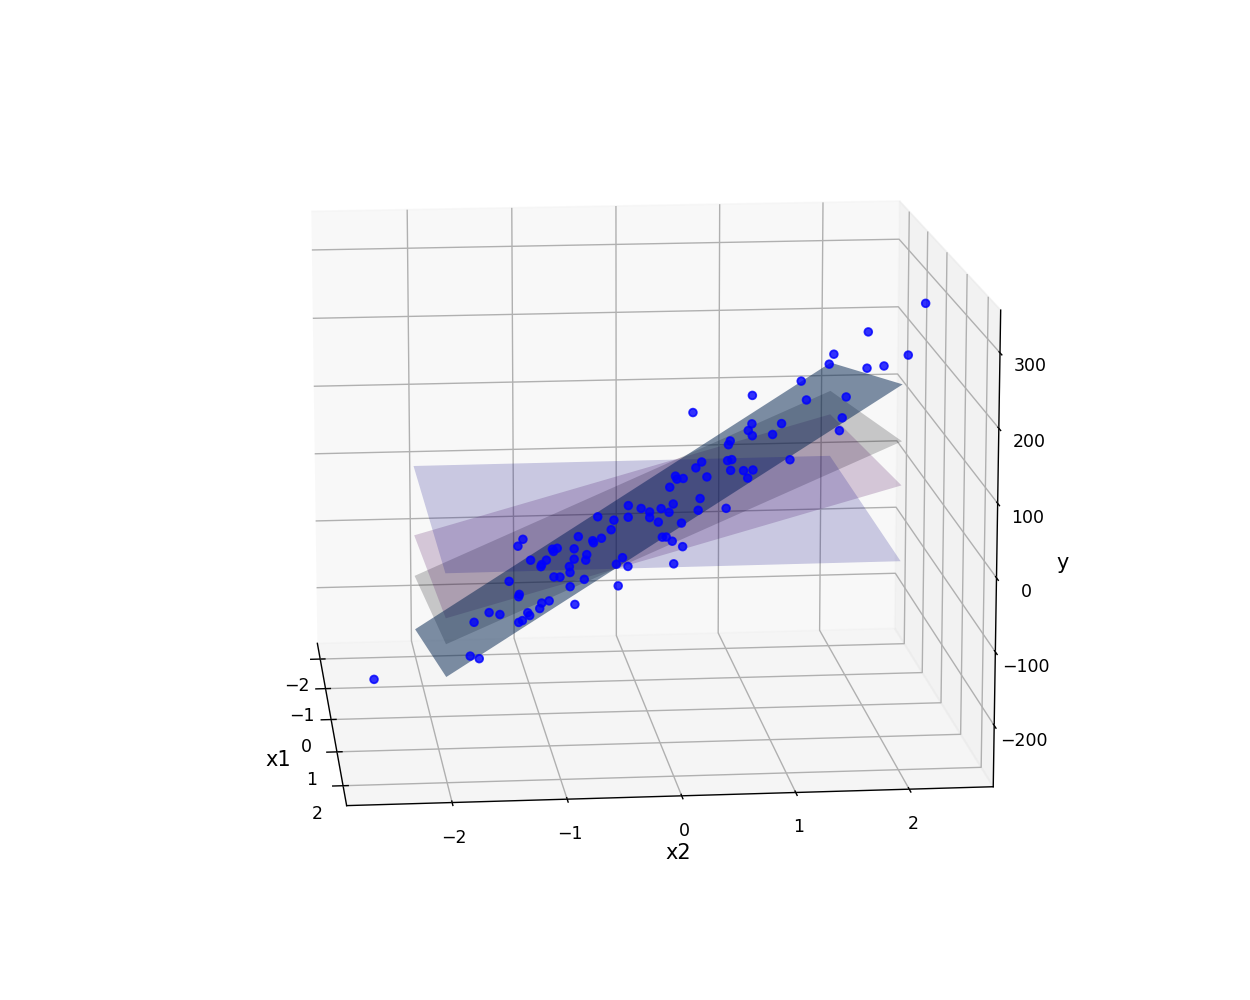

In [60]:
%matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')

#plane calculation
k = 3 #size of the plane

p1, p2 = np.mgrid[-2:k, -2:k]

P = np.hstack(( np.reshape(p1, (5*5, 1)), np.reshape(p2, (5*5, 1))))
P = np.hstack((P, np.ones((5*5, 1))))

plane0 = np.reshape(np.dot(P, theta), (5, 5));
plane100 = np.reshape(np.dot(P, thetaiter[:,:,50]), (5, 5));
plane200 = np.reshape(np.dot(P, thetaiter[:,:,100]), (5, 5));
planeFinal = np.reshape(np.dot(P, theta_final), (5, 5));

ax.scatter(Xcst[:,0] ,Xcst[:,1], y, c = 'b', s= 20, depthshade=True,alpha=0.8)

ax.plot_surface(p1,p2,plane0, rstride=10, cstride=10, cmap="plasma", alpha=0.2, label ="Initial Model")
ax.plot_surface(p1,p2,plane100, rstride=10, cstride=10, cmap="viridis", alpha=0.2, label ="Model iter50")
ax.plot_surface(p1,p2,plane200, rstride=10, cstride=10, cmap="magma", alpha=0.2, label ="Initial iter100")
ax.plot_surface(p1,p2,planeFinal, rstride=10, cstride=10, cmap="cividis", alpha=0.5, label ="Final Model")

ax.set_xlabel('x1', fontsize=12)
ax.set_ylabel('x2', fontsize=12)
ax.set_zlabel('y', fontsize=12)
plt.tight_layout(pad=1.08,h_pad=X[:,0], w_pad=X[:,1])
plt.grid(True)
plt.legend
plt.show()

Visualizing cost history (learning curve)

<IPython.core.display.Javascript object>


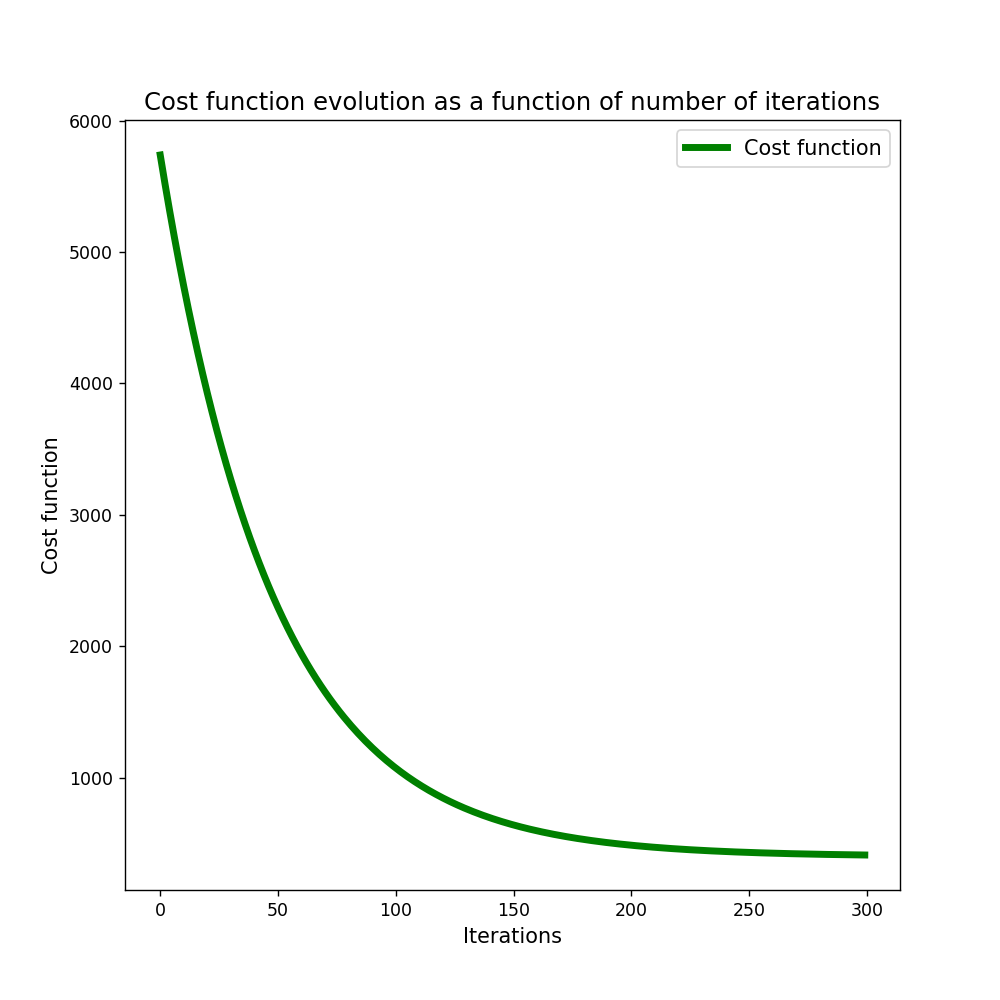

In [69]:
ax, fig =plt.subplots(figsize=(8,8))
plt.plot(range(n_iterations), cost_history, c='green', lw=4, label= 'Cost function')

# plt.xlim(0,10)
plt.xlabel('Iterations', fontsize=12)
plt.ylabel('Cost function', fontsize=12)
plt.title('Cost function evolution as a function of number of iterations',fontsize=14)
# plt.text(7, 50000, "Modélisation", fontsize=14)

plt.legend(fontsize=12, loc=0)

Visualizing r_square history (learning curve)

In [64]:
def R2_evol(X, y, theta, learning_rate, n_iterations):
    R2_history =np.zeros(n_iterations)
    thetaiter = np.random.rand(3,1,n_iterations)
    for i in range(0,n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        thetaiter[:,:,i]=theta
        predictions = model(X, theta)
        R2_history[i] = coef_determination(y, predictions)
    return theta, thetaiter, R2_history

In [65]:
theta, thetaiter, R2_history = R2_evol(Xcst, y, theta, learning_rate, n_iterations)

<IPython.core.display.Javascript object>


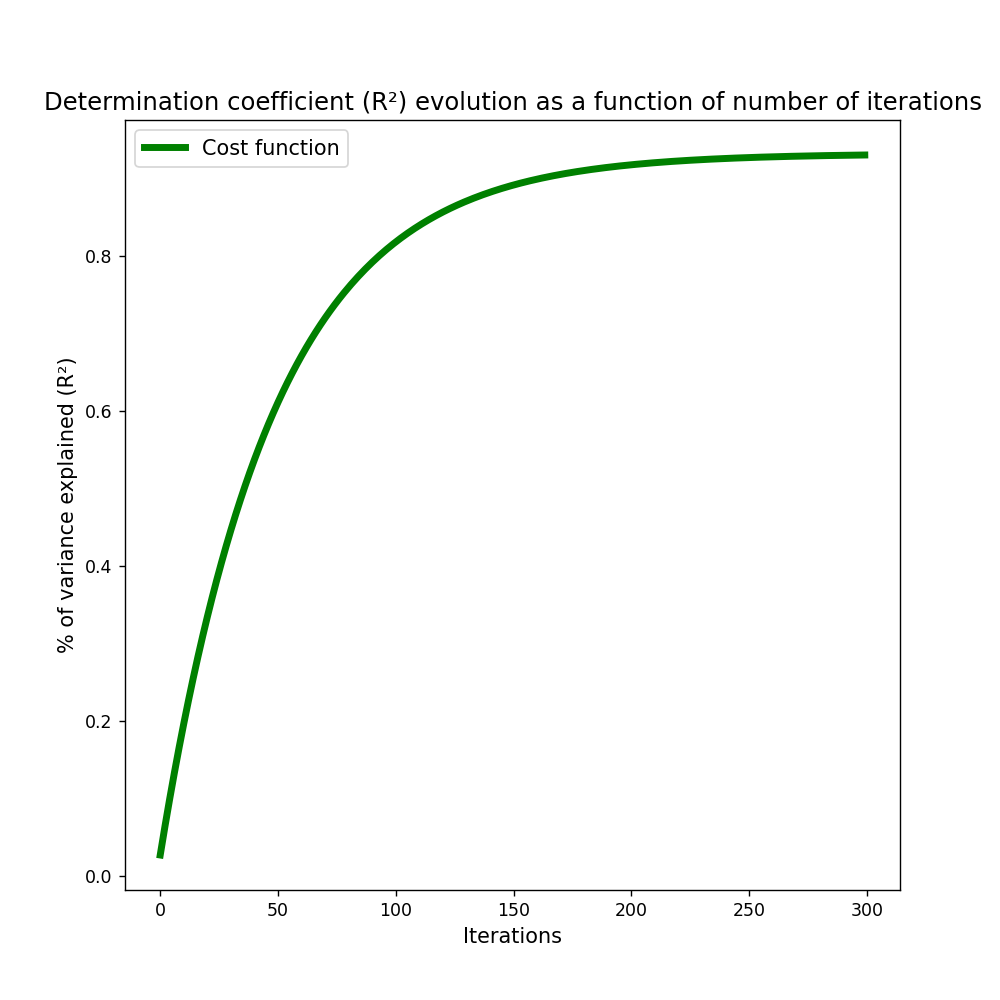

In [68]:
ax, fig =plt.subplots(figsize=(8,8))
plt.plot(range(n_iterations), R2_history, c='green', lw=4, label= 'Cost function')

# plt.xlim(0,10)
plt.xlabel('Iterations', fontsize=12)
plt.ylabel('% of variance explained (R²)', fontsize=12)
plt.title('Determination coefficient (R²) evolution as a function of number of iterations',fontsize=14)
# plt.text(7, 50000, "Modélisation", fontsize=14)

plt.legend(fontsize=12, loc=0)

### Polynomial regression 

Load and preprocess dataset

In [76]:
df = pd.read_csv("./data/poly.csv")
df.head(3)

,x,y
0,0.302472,-4.306789
1,-1.270485,-56.483346
2,1.532779,211.100819


In [77]:
#X= df['x'].to_numpy().reshape(200,1)
X= df[['x']].to_numpy()
#y= df['y'].to_numpy().reshape(200,1)
y= df[['y']].to_numpy()

In [78]:
df.corr()

,x,y
x,1.000000,0.911229
y,0.911229,1.000000


<IPython.core.display.Javascript object>


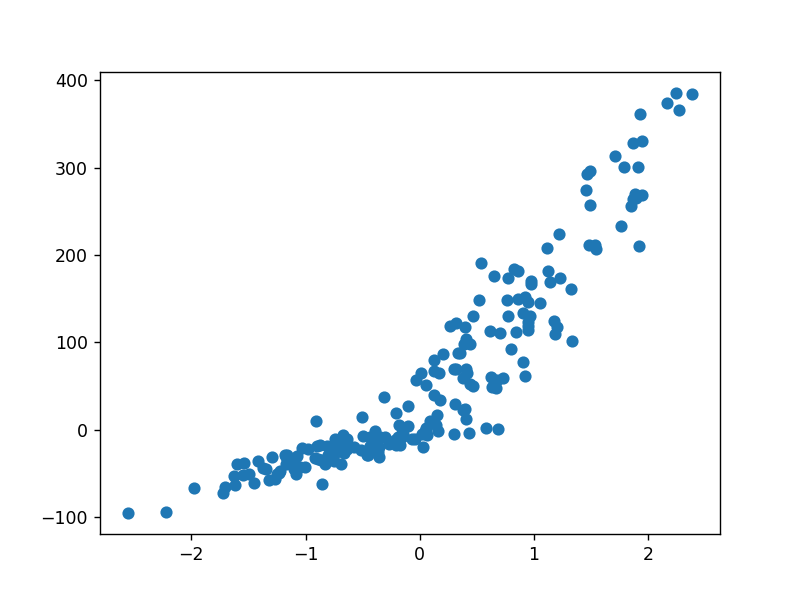

In [79]:
plt.scatter(X,y)

Creating polynomials and polynomial matrices up to the 5th 

In [80]:
# polynomials and const
X2 = X**2
X3 = X**3
X4 = X**4
X5 = X**5
const = np.ones((200,1))

# polynomial matrices
Xpoly1 = np.hstack((X, const))
Xpoly2 = np.hstack((X, X2, const))
Xpoly3 = np.hstack((X, X2, X3, const))
Xpoly4 = np.hstack((X, X2, X3, X4, const))
Xpoly5 = np.hstack((X, X2, X3, X4, X5, const))

Initializing theta vectors for each polynomial

In [82]:
theta1 = np.random.rand(2,1)
theta2 = np.random.rand(3,1)
theta3 = np.random.rand(4,1)
theta4 = np.random.rand(5,1)
theta5 = np.random.rand(6,1)

Defining gradient descent fonction 

In [84]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history =np.zeros(n_iterations)
    for i in range(0,n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = MSE(X,y,theta)
    return theta, cost_history

In [86]:
n_iterations=1000
learning_rate=0.01

Computing theta final for each polynomials 

In [87]:
theta_final1, cost_history1= gradient_descent(Xpoly1, y, theta1, learning_rate, n_iterations)
theta_final2, cost_history2= gradient_descent(Xpoly2, y, theta2, learning_rate, n_iterations)
theta_final3, cost_history3= gradient_descent(Xpoly3, y, theta3, learning_rate, n_iterations)
theta_final4, cost_history4= gradient_descent(Xpoly4, y, theta4, learning_rate, n_iterations)
theta_final5, cost_history5= gradient_descent(Xpoly5, y, theta5, learning_rate, n_iterations)

Setting X's for plotting each polynomial prediction 

In [88]:
X_plot = np.linspace(X.min(), X.max(), 100).reshape(100)
X_plot1 = np.linspace(X.min(), X.max(), 100).reshape(100,1)
X_plot2 = X_plot1**2
X_plot3 = X_plot1**3
X_plot4 = X_plot1**4
X_plot5 = X_plot1**5
const = np.ones((100,1))
Xpoly1_pl = np.hstack((X_plot1, const))
Xpoly2_pl = np.hstack((X_plot1, X_plot2, const))
Xpoly3_pl = np.hstack((X_plot1, X_plot2, X_plot3, const))
Xpoly4_pl = np.hstack((X_plot1, X_plot2, X_plot3, X_plot4, const))
Xpoly5_pl = np.hstack((X_plot1, X_plot2, X_plot3, X_plot4, X_plot5, const))

In [89]:
predictions1 = model(Xpoly1_pl, theta_final1)
predictions2 = model(Xpoly2_pl, theta_final2)
predictions3 = model(Xpoly3_pl, theta_final3)
predictions4 = model(Xpoly4_pl, theta_final4)
predictions5 = model(Xpoly5_pl, theta_final5)

Visualizing each polynomial prediction

<IPython.core.display.Javascript object>


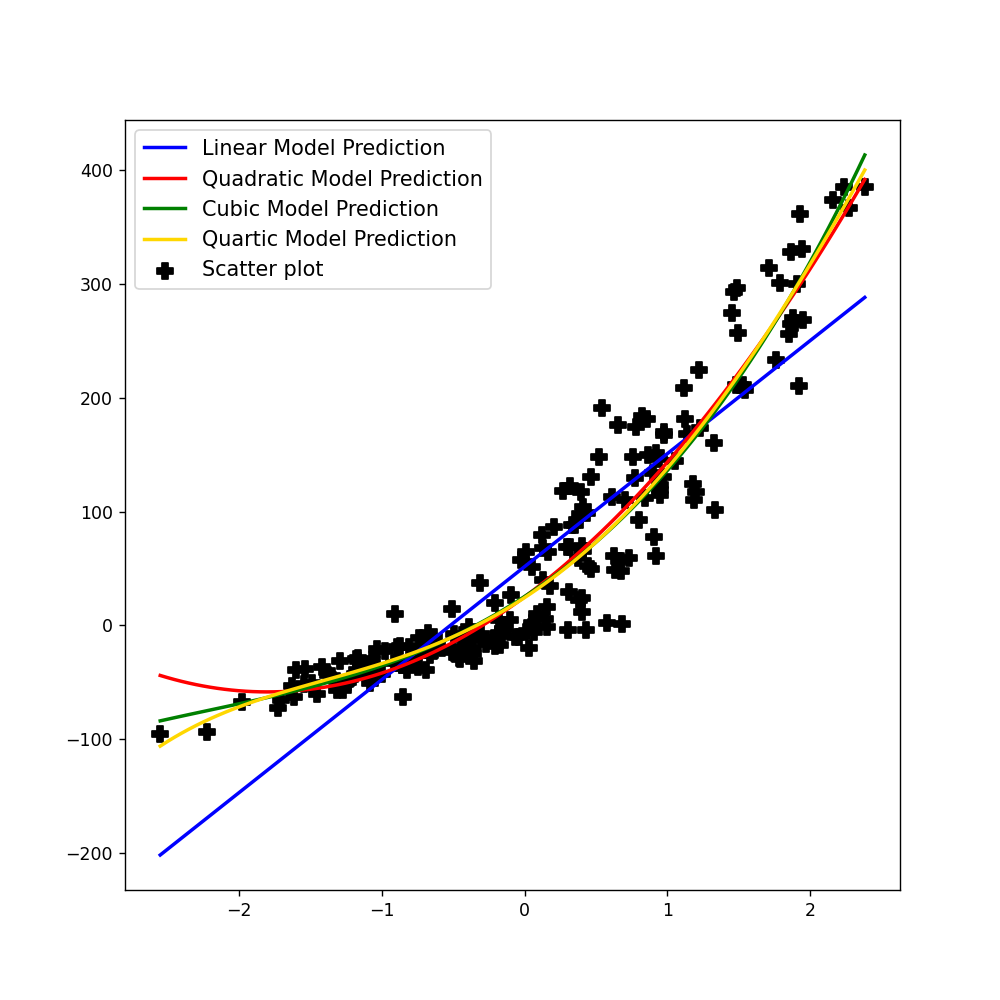

In [93]:
ax, fig =plt.subplots(figsize=(8,8))
plt.scatter(X,y, s=80, c='black', marker='P', label="Scatter plot")

plt.plot(X_plot,predictions1, c='blue', lw=2, label= 'Linear Model Prediction')
plt.plot(X_plot,predictions2, c='red', lw=2, label= 'Quadratic Model Prediction')
plt.plot(X_plot,predictions3, c='green', lw=2, label= 'Cubic Model Prediction')
plt.plot(X_plot,predictions4, c='gold', lw=2, label= 'Quartic Model Prediction')
# plt.plot(X_plot,predictions5, c='orange', lw=2, label= 'Quintic Model Prediction')



plt.legend(fontsize=12, loc=0)


Visualizing cost history for each polynomial regression 

<IPython.core.display.Javascript object>


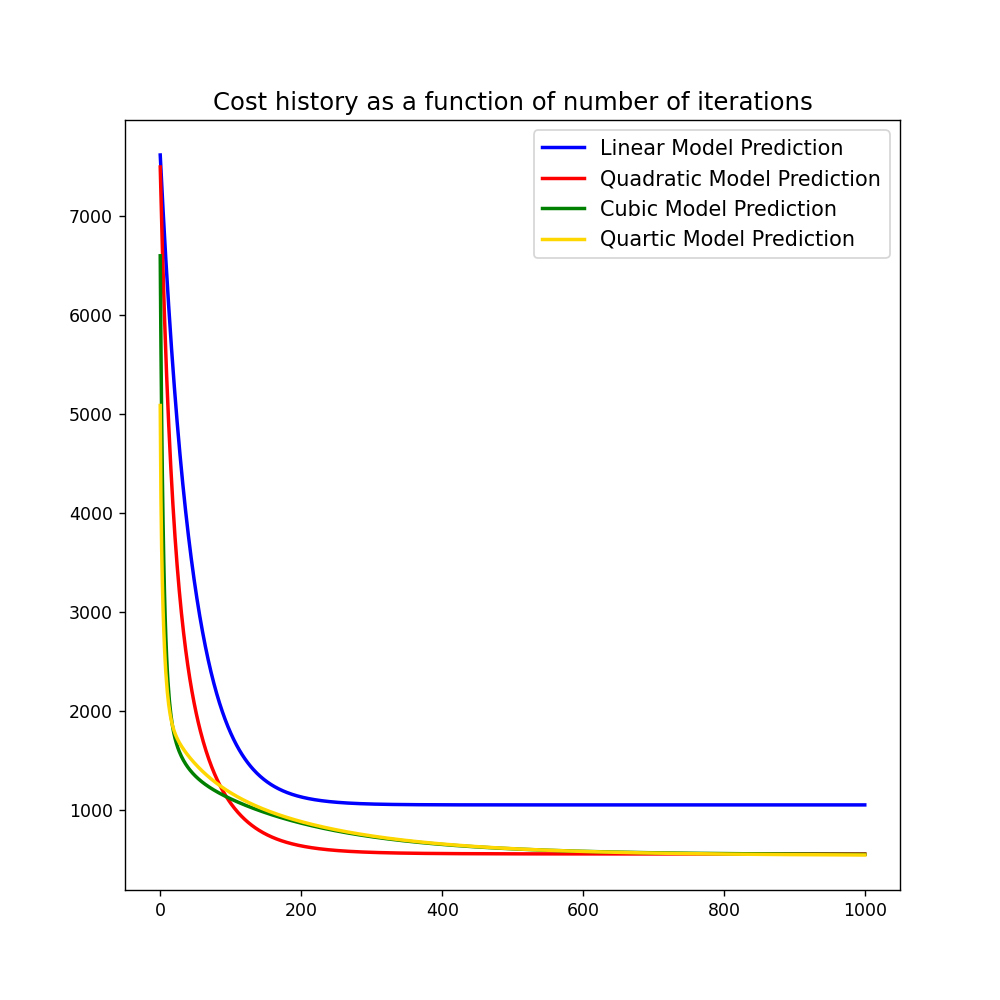

In [104]:
ax, fig =plt.subplots(figsize=(8,8))
# plt.scatter(X,y, s=80, c='black', marker='P', label="Scatter plot")

plt.plot(cost_history1, c='blue', lw=2, label= 'Linear Model Prediction')
plt.plot(cost_history2, c='red', lw=2, label= 'Quadratic Model Prediction')
plt.plot(cost_history3, c='green', lw=2, label= 'Cubic Model Prediction')
plt.plot(cost_history4, c='gold', lw=2, label= 'Quartic Model Prediction')
#plt.plot(cost_history5, c='orange', lw=2, label= 'Quintic Model Prediction')

plt.title('Cost history as a function of number of iterations',fontsize=14)

plt.legend(fontsize=12, loc=0)